# Chapter 2

In [3]:
# We need these as some functions have moved from Base to Stdlib
#
using Printf, SpecialFunctions, Statistics, Images, ImageView

[ Info: Precompiling SpecialFunctionsExt [997ecda8-951a-5f50-90ea-61382e97704b]
[ Info: Precompiling SpecialFunctionsChainRulesCoreExt [9eb7bdd4-e44c-55fc-b9cc-1a32cb715188]
[ Info: Precompiling SpecialFunctionsExt [499d2952-c3ce-5339-96ee-b197ee6daaa6]
[ Info: Precompiling ImageView [86fae568-95e7-573e-a6b2-d8a6b900c9ef]


### Arithmetic data types

In [4]:
x = 2;   typeof(x)

Int64

In [5]:
x = 2.0;  typeof(x)

Float64

In [6]:
x0 = 2^65
x1 = big(2)^65
@assert x0 == x1

LoadError: AssertionError: x0 == x1

In [7]:
for T = Any[Int8,Int16,Int32,Int64,Int128,UInt8,UInt16,UInt32,UInt64,UInt128]
    println("$(lpad(T,7)): [$(typemin(T)),$(typemax(T))]")
end

   Int8: [-128,127]
  Int16: [-32768,32767]
  Int32: [-2147483648,2147483647]
  Int64: [-9223372036854775808,9223372036854775807]
 Int128: [-170141183460469231731687303715884105728,170141183460469231731687303715884105727]
  UInt8: [0,255]
 UInt16: [0,65535]
 UInt32: [0,4294967295]
 UInt64: [0,18446744073709551615]
UInt128: [0,340282366920938463463374607431768211455]


### Logical and Bit datatypes

In [8]:
x = 0xbb31; y = 0xaa5f;  xor(x,y)

0x116e

In [9]:
x = 0xbb31;  x << 8

0x3100

In [10]:
x = 0xbb31; p = (2 < 3); x + p

0xbb32


### Arrays

In [11]:
# v1.0 requires the Statistics module for mean(), std() etc.
#
using Statistics

# Mean of 15 random numbers in range 0:100
#
A = rand(0:100,15)
mean(A)

45.733333333333334

In [12]:
# Create an empty array, note new syntax
# 'undef' will not initialise the elements
#
A = Array{Int64,1}(undef, 15)

# Verify: Tuple of the element type and the dimension sizes
#
(eltype(A),size(A))

(Int64, (15,))

In [13]:
# Fill array A with the first 15 Fibonnaci series
#
A[1] = 1
A[2] = 1
[A[i] = A[i-1] + A[i-2] for i = 3:length(A)]

13-element Vector{Int64}:
   2
   3
   5
   8
  13
  21
  34
  55
  89
 144
 233
 377
 610

### Factorials

In [14]:
# The 'recursive' definition of factorial function
# A simple loop is much quicker
#
function fac(n::Integer)
  @assert n > 0
  (n == 1) ? 1 : n*fac(n-1)
end

fac (generic function with 1 method)

In [15]:
# This has difficulties with integer overflow
# We now need the Printf module to use the @printf macro
#
using Printf
for i = 1:30
  @printf "%3d : %d \n" i fac(i)
end

  1 : 1 
  2 : 2 
  3 : 6 
  4 : 24 
  5 : 120 
  6 : 720 
  7 : 5040 
  8 : 40320 
  9 : 362880 
 10 : 3628800 
 11 : 39916800 
 12 : 479001600 
 13 : 6227020800 
 14 : 87178291200 
 15 : 1307674368000 
 16 : 20922789888000 
 17 : 355687428096000 
 18 : 6402373705728000 
 19 : 121645100408832000 
 20 : 2432902008176640000 
 21 : -4249290049419214848 
 22 : -1250660718674968576 
 23 : 8128291617894825984 
 24 : -7835185981329244160 
 25 : 7034535277573963776 
 26 : -1569523520172457984 
 27 : -5483646897237262336 
 28 : -5968160532966932480 
 29 : -7055958792655077376 
 30 : -8764578968847253504 


In [18]:
# But since a BigInt <: Integer if we pass a BigInt the reoutine returns one
#
fac(big(30))

265252859812191058636308480000000

In [19]:
# Find stdlib, location is O/S dependent

cd(Sys.BINDIR)
pwd()

"/Applications/Julia-1.9.app/Contents/Resources/julia/bin"

In [21]:
cd("/Applications/Julia-1.9.app/Contents/Resources/julia")
pwd()

"/Applications/Julia-1.9.app/Contents/Resources/julia"

In [17]:
# We can check this using the gamma function
# Again we need a module (SpecialFunctions)
#
using SpecialFunctions
gamma(31)     # Γ(n+1)  <=>  n!

2.6525285981219107e32

In [16]:
# This non-recursive one liner works!
# Note that this returns a BigInt regardless of the input
#
fac(N::Integer) = 
  (N < 1) ? throw(ArgumentError("N must be positive")) : reduce(*,big.(collect(1:N)))

@time(fac(402))

  0.000641 seconds (2.01 k allocations: 103.617 KiB)


10322493151921465164081017511444523549144957788957729070658850054871632028467255601190963314928373192348001901396930189622367360453148777593779130493841936873495349332423413459470518031076600468677681086479354644916620480632630350145970538235260826120203515476630017152557002993632050731959317164706296917171625287200618560036028326143938282329483693985566225033103398611546364400484246579470387915281737632989645795534475998050620039413447425490893877731061666015468384131920640823824733578473025588407103553854530737735183050931478983505845362197959913863770041359352031682005647007823330600995250982455385703739491695583970372977196372367980241040180516191489137558020294105537577853569647066137370488100581103217089054291400441697731894590238418118698720784367447615471616000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [22]:
gamma(big(403.0))

1.032249315192146516408101751144452354914495778895772907065885005487163202846731e+874

---

### Broadcasting

In [23]:
# Define a 2x3 matrix of rational numbers and convert to floats
X = convert.(Float64, [11/17 2//9 3//7; 4//13 5//11 6//23])

# Round to 4 decimal places
round.(X,digits=4)

2×3 Matrix{Float64}:
 0.6471  0.2222  0.4286
 0.3077  0.4545  0.2609

In [24]:
# This does NOT work
f(x) = x*sin(3.0x)*exp(-0.03x)
Y = f(X)

LoadError: DimensionMismatch: matrix is not square: dimensions are (2, 3)

In [25]:
# But this does
Y = f.(X)

2×3 Matrix{Float64}:
 0.591586  0.136502  0.40602
 0.243118  0.438802  0.182513

In [26]:
# Of course this could also be done without the temporary function
Y = X .* sin.(3.0 .* X) .* exp.(- 0.03 .* X)

2×3 Matrix{Float64}:
 0.591586  0.136502  0.40602
 0.243118  0.438802  0.182513

In [27]:
# Using a list comprehension is a bit more combursome
Y = reshape(zeros(6),2,3);
[Y[i,j] = X[i,j]*sin(3.0*X[i,j])*exp(-0.03*X[i,j]) for i=1:2 for j=1:3];
Y

2×3 Matrix{Float64}:
 0.591586  0.136502  0.40602
 0.243118  0.438802  0.182513

---

### Methods for generating Fibonacci sequences

In [28]:
# The 'standard' recursive definition

function fib(k::Integer)
  @assert k > 0
  (k < 3) ? 1 : fib(k-1) + fib(k-2)
end

@time fib(15)

  0.000006 seconds


610

In [29]:
# A better version

function fib(n::Integer)
  @assert n > 0
  a = Array{typeof(n),1}(undef,n)
  a[1] = 0
  a[2] = 1
  for i = 3:n
    a[i] = a[i-1] + a[i-2]
  end
  return a[n]
end

@time(fib(big(402)))


  0.000514 seconds (6.40 k allocations: 133.555 KiB)


284812298108489611757988937681460995615380088782304890986477195645969271404032323901

In [30]:
# A still better version
# This requires no array storage

function fib(n::Integer)
  @assert n > 0
  (a, b) = (big(0), big(1))
  while n > 0
    (a, b) = (b, a+b)
    n -= 1
  end
  return a
end


fib (generic function with 1 method)

In [ ]:
# Golden ratio

using Printf
@printf "%.15f" fib(101)/fib(100)

In [31]:
# Check with the actual value

γ = (1.0 + sqrt(5.0))/2.0

1.618033988749895

---

### Sieve of Eratosthenes

In [32]:
cop(X, i) = any(j -> i % j == 0, X)

cop (generic function with 1 method)

In [33]:
function erato(N::Integer)
  @assert N > 0
  P = Int[]
  for i in 2:N
    if !cop(P, i)
      push!(P, i)
    end
  end
  return P
end

erato (generic function with 1 method)

In [35]:
tm = @elapsed A = erato(1_000_000);
print("Computed $(length(A)) primes in $(round(tm, digits=4)) sec.")

Computed 78498 primes in 12.6976 sec.

---

### Generate a *Julia* set

In [36]:
function juliaset(z, z0, nmax::Int64)
    for n = 1:nmax
        if abs(z) > 2 (return n-1) end
        z = z^2 + z0
    end
    return nmax
end

juliaset (generic function with 1 method)

In [37]:
function create_pgmfile(img, outf::String)
    s = open(outf, "w")
    write(s, "P5\n")    
    n, m = size(img)
    write(s, "$m $n 255\n")
    for i=1:n, j=1:m
        p = min(img[i,j],255)
        write(s, UInt8(p))
    end
    close(s)
end

create_pgmfile (generic function with 1 method)

In [38]:
h = 400; 
w = 800; 
m = Array{Int64,2}(undef,h,w);

c0 = -0.8 + 0.16im;
pgm_name = "jset.pgm";

t0 = time();
for y=1:h, x=1:w
    c = complex((x-w/2)/(w/2), (y-h/2)/(w/2))
    m[y,x] = juliaset(c, c0, 256)
end

t1 = time();
(t1 - t0)

0.3423638343811035

In [39]:
# You should find the file in the same chapter as the notebook

using Printf
create_pgmfile(m, pgm_name);
@printf "Written %s\nFinished in %.4f seconds.\n" pgm_name (t1-t0);


Written jset.pgm
Finished in 0.3424 seconds.


In [40]:
using ImageView, Images

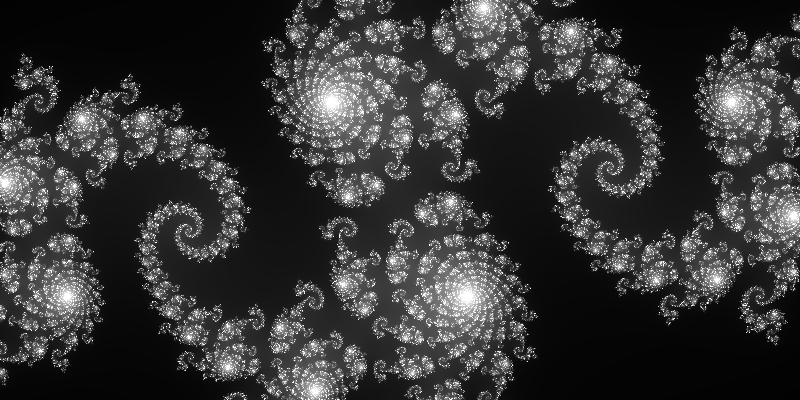

In [41]:
# Display the image using Imagemagick's display command
# Clicking the file may display it (OSX/XQuartz and Centos/Gnome certainly does)
# On OSX use:  brew reinstall imagemagick --with-x11
#
# Otherwise you make be able to click onit (OSX or Linux)
# or on WIndows use an image processing program such as Irfanview
# We will be looking at how to do this in Julia later.

here = pwd()
img = load("$here/$pgm_name")

---

In [42]:
using SparseArrays

In [43]:
A = sprand(5,5,0.3)

5×5 SparseMatrixCSC{Float64, Int64} with 7 stored entries:
  ⋅          ⋅         ⋅       0.563121   ⋅ 
  ⋅         0.113728  0.35797   ⋅         ⋅ 
 0.0315498   ⋅         ⋅        ⋅        0.121222
  ⋅         0.757807   ⋅        ⋅         ⋅ 
  ⋅          ⋅         ⋅        ⋅        0.659578

In [44]:
A * A

5×5 SparseMatrixCSC{Float64, Int64} with 10 stored entries:
  ⋅         0.426737    ⋅          ⋅          ⋅ 
 0.0112939  0.0129342  0.0407114   ⋅         0.043394
  ⋅          ⋅          ⋅         0.0177664  0.0799556
  ⋅         0.0861842  0.271272    ⋅          ⋅ 
  ⋅          ⋅          ⋅          ⋅         0.435043

In [45]:
convert(Matrix,A);

In [46]:
A = spdiagm(ones(Int64,3)) 

3×3 SparseMatrixCSC{Int64, Int64} with 3 stored entries:
 1  ⋅  ⋅
 ⋅  1  ⋅
 ⋅  ⋅  1

In [47]:
convert(Matrix{Float64},A)

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [48]:
using DataFrames, Statistics

In [49]:
df1 = DataFrame(ID = 1:4, Cost = [10.1,7.9,missing,4.5]);

In [50]:
df2 = dropmissing(df1)

Row,ID,Cost
,Int64,Float64
1,1,10.1
2,2,7.9
3,4,4.5


In [51]:
(μ,σ) = (mean(df2[!,:Cost]),std(df2[!,:Cost]))

(7.5, 2.8213471959331766)

---

In [52]:
using Base64

In [53]:
struct UserCreds
  uid::Int
  password::String
  fullname::String
  email::String
  admin::Bool
end

In [54]:
function matchPwds(
  uc::Dict{String,UserCreds}, uname::String, pwd::String)
  return (uc[uname].password == base64encode(pwd) ? true : false)
end

matchPwds (generic function with 1 method)

In [55]:
isAdmin(uc::Dict{String,UserCreds},fname::String) = uc[fname].admin

isAdmin (generic function with 1 method)

In [56]:
AA = Dict{String,UserCreds}();
AA["malcolm"] = UserCreds(101,base64encode("Pa55word"),"Malcolm Sherrington","malcolm@myemail.org",true);

println(matchPwds(AA,"malcolm","Pa55word") ? "OK" : "No, sorry");

OK


In [57]:
isAdmin(AA,"malcolm")

true

---

In [58]:
using DataStructures
S = Stack{Char}(100);
Q = Queue{Char}(100); 

In [59]:
greet = "Here's looking at you kid!";
for i = 1:lastindex(greet)
  push!(S,greet[i])
  enqueue!(Q,greet[i])
end

In [60]:
for i = 1:lastindex(greet) print(pop!(S)) end

!dik uoy ta gnikool s'ereH

In [61]:
for i = 1:lastindex(greet) print(dequeue!(Q)) end

Here's looking at you kid!